In [1]:
import json
from sklearn.manifold import TSNE
from core.clustering import gmm_rand, recode_labels

In [61]:
with open('../data/pipeline_results/sparse/thing_n.json', 'r') as f:
    run_results = json.load(f)

In [65]:
run_tsne = TSNE(n_components = 3)
tsne_results = run_tsne.fit_transform(run_results['embeddings'])
true_labels = recode_labels(run_results['sense_labels'])

In [66]:
num_senses = len(set(run_results['sense_labels']))
gmm_results = gmm_rand(tsne_results, num_senses, true_labels)

In [67]:
gmm_results['GMM']

[0.028930809701205554, 0.007181062978802323]

In [74]:
def tsne_rand(pipeline_output):
    #Only works for 2-3 components
    results_for_word = []
    for c in range(2, 4):
        tsne = TSNE(n_components = c)
        tsne_results = tsne.fit_transform(pipeline_output['embeddings'])
        true_labels = recode_labels(pipeline_output['sense_labels'])
        num_senses = len(set(true_labels))
        gmm_results = gmm_rand(tsne_results, num_senses, true_labels)
        results_for_word.append({'Lemma': pipeline_output['lemma'], 'Principle Components': c,
                                 'WordNet Mean': gmm_results['GMM'][0], 'WordNet SD': gmm_results['GMM'][1], 
        'Random Mean': gmm_results['Random'][0],
        'Random SD': gmm_results['Random'][1]})
    return results_for_word

In [75]:
tsne_rand(run_results)

[{'Lemma': 'thing.n',
  'Principle Components': 2,
  'WordNet Mean': 0.06274224522273304,
  'WordNet SD': 0.011991986200867446,
  'Random Mean': -2.1459174591366235e-05,
  'Random SD': 0.005538075242126371},
 {'Lemma': 'thing.n',
  'Principle Components': 3,
  'WordNet Mean': 0.054681518536964346,
  'WordNet SD': 0.009113243902351052,
  'Random Mean': -0.0001917120679403425,
  'Random SD': 0.005250702422936682}]

In [1]:
import semcor_bert_pipeline
from automation import *

In [3]:
word_results = semcor_bert_pipeline.load_data('serve', 'v')

FileNotFoundError: [Errno 2] No such file or directory: 'data/clustering_results/serve_v/tsne.png'

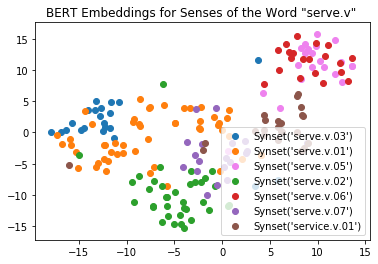

In [6]:
plot_embeddings(word_results['embeddings'], word_results['sense_indices'], word_results['sense_names'], word_results['lemma'], savefile = True)

In [11]:
color_dict

{"Synset('serve": 'C5', "Synset('service": 'C6'}

In [12]:
label_dict

{0: {'color': 'C0', 'label': "Synset('serve"},
 1: {'color': 'C1', 'label': "Synset('serve"},
 2: {'color': 'C2', 'label': "Synset('serve"},
 3: {'color': 'C3', 'label': "Synset('serve"},
 4: {'color': 'C4', 'label': "Synset('serve"},
 5: {'color': 'C5', 'label': "Synset('serve"},
 6: {'color': 'C6', 'label': "Synset('service"}}

In [22]:
sense_names_rev = [i.split('Synset')[1].strip('\'()') for i in word_results['sense_names']]

In [14]:
word_results = semcor_bert_pipeline.load_data('run', 'v')

In [24]:
sense_names_rev

['operate.v.01', 'run.v.01', 'run.v.03']

In [29]:
def create_dendrogram_colors(senses):
    color_dict = {}
    label_dict = {}
    for i in range(len(senses)):
        mplotlib_color = 'C' + str(i)
        sense = senses[i]
        color_dict[sense] = mplotlib_color
        label_dict[i] = {'color': mplotlib_color, 'label': sense}
    return color_dict, label_dict


In [30]:
color_dict, label_dict = create_dendrogram_colors(sense_names_rev)

color_dict, label_dict

({'operate.v.01': 'C0', 'run.v.01': 'C1', 'run.v.03': 'C2'},
 {0: {'color': 'C0', 'label': 'operate.v.01'},
  1: {'color': 'C1', 'label': 'run.v.01'},
  2: {'color': 'C2', 'label': 'run.v.03'}})

In [34]:
word_results['sense_labels']

['operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'operate.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 'run.v.01',
 

In [3]:
model = semcor_bert_pipeline.initialize_model()

In [2]:
word = 'serve'
pos = 'v'

In [6]:
dir_name = os.path.join("data", 'clustering_results', word + '_' + pos)
os.system('mkdir ' + dir_name)


0

In [ ]:
run_clustering('serve', 'v', model)

serve v
Getting data from SEMCOR
Getting sentences for relevant senses
Senses for word serve.v
Number of sentences for sense Synset('serve.v.05') 21
Number of sentences for sense Synset('serve.v.02') 36
Number of sentences for sense Synset('serve.v.01') 52
Number of sentences for sense Synset('serve.v.07') 19
Number of sentences for sense Synset('service.v.01') 23
Number of sentences for sense Synset('serve.v.06') 20
Number of sentences for sense Synset('serve.v.03') 23
Generating BERT embeddings
